In [1]:
import scipy
import numpy as np
import pandas as pd

In [2]:
def par(x):
    return x%2==0

In [4]:
espacio_muestral = [1,2,3,4,5,6]

caras = len(espacio_muestral)

pares = len([e for e in espacio_muestral if par(e)])
pares_prob = pares/caras

pares_prob

0.5

In [5]:
import random

In [6]:
def volado():
    cara = 0
    m = random.random()
    if m <= 0.5:
        cara +=1
    return cara


def tiros(n):
    tiros_l = []
    for i in range(n):
        tiros_l.append(volado())
        
    return (sum(tiros_l)/n)

In [7]:
tiros(2)

0.5

In [8]:
tiros(3)

0.6666666666666666

In [9]:
tiros(10000)

0.503

# Bayes

https://en.wikipedia.org/wiki/Thomas_Bayes

![bayes](data/bayes0.jpeg)

$$A \cap B = B \cap A$$

$$P(A \cap B) = P(B \cap A)$$

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

### Regla de Bayes


$$P(B) = \sum_{\Omega} P(B|A)P(A)$$

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

# Ejemplo: Seguro de coche segun color

**Eventos**

+ $A: =$ Accidente de coche
+ $B: =$ Color del coche (rojo, por ejemplo)

**¿Que es cada cosa?**

+ $P(A|B) :=$ ¿Prob de tener un accidente si mi coche es rojo? (lo que buscamos)
+ $P(A) :=$ Prob de accidente (proporcion de coches accidentados en todo el parque movil)
+ $P(B|A) :=$ Si ya he tenido un accidente, ¿cual es la prob de que mi coche sea rojo? (proporcion de coches rojos entre los accidentados)
+ $P(B) :=$ Prob de coche rojo (proporcion de coches rojos en todo el parque movil)

**Supongamos...**
 
+ $P(A) = 0.1$ 
+ $P(B|A) = 0.3$ 
+ $P(B) = 0.2$


**Entonces..**

In [10]:
print ('P(A|B) = {}'.format(0.3*0.1/0.2))

P(A|B) = 0.15


In [11]:
print (f'P(A|B) = {0.3*0.1/0.2}')

P(A|B) = 0.15


In [12]:
def bayes(priori, verosimilitud):                    # regla de Bayes
    marginal=sum(np.multiply(priori, verosimilitud)) #P(B)
    posteriori=np.divide(np.multiply(priori, verosimilitud), marginal) #P(B|A)P(A)/P(B)
    return posteriori

### 1. Monty Hall Problem
Suppose you are a contestant on the popular game show Let's Make a Deal. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [15]:
prioris=[1/3, 1/3, 1/3]  #33% de ganar #66%de perder

v_premio = [0,1/2,1] #Verosimilitud

bayes(prioris,v_premio)

array([0.        , 0.33333333, 0.66666667])

### 1. Cookie Problem
Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
prioris=[1/2, 1/2] #prioris

v_vainilla = [3/4, 2/4] #Verosimilitud
v_chocolate = [1/4, 2/4]

In [20]:
bayes(prioris,v_vainilla) 

array([0.6, 0.4])

In [22]:
print (bayes(prioris, v_vainilla)[0])
# 0.6 => 60% de probabilidad de que venga del cuenco de galletas 1.

0.6


In [21]:
bayes(prioris,v_chocolate) 

array([0.2, 0.8])

In [24]:
print (bayes(prioris, v_vainilla)[1])
# 0.4 => 40% de probabilidad de que venga del cuenco de galletas 2.

0.4


### 2. Candy Problem
Suppose you have two bags of candies:

In **Bag 1**, the mix of colors is:
* Brown - 30%
* Yellow - 20%
* Red - 20%
* Green - 10%
* Orange - 10%
* Tan - 10%


In **Bag 2**, the mix of colors is:
* Blue - 24%
* Green - 20%
* Orange - 16%
* Yellow - 14%
* Red - 13%
* Brown - 13%




Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.

In [25]:
prioris=[1/2, 1/2]         # bolsas

In [26]:
v_marron=[0.3, 0.13]       # verosimilitud marron
v_amarillo=[0.2, 0.14]     # verosimilitud amarillo
v_rojo=[0.2, 0.13]         # verosimilitud rojo
v_verde=[0.1, 0.2]         # verosimilitud verde
v_naranja=[0.1, 0.16]      # verosimilitud naranja
v_mandarina=[0.1, 0]       # verosimilitud mandarina

In [28]:
print(bayes(prioris, [v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]]))
# 0.7407 => 74.1% de probabilidad de que la amarilla venga de la bolsa 1.

[0.74074074 0.25925926]


What is the probability that the yellow candy came from Bag 2?

In [29]:
print (bayes(prioris, [v_amarillo[0]*v_verde[1], v_amarillo[1]*v_verde[0]])[1])
# 0.259 => 25.9% de probabilidad de que la amarilla venga de la bolsa 2.

0.25925925925925924


# Distribuciones discretas

In [32]:
from scipy.stats import binom
import matplotlib.pyplot as plt

In [33]:
#binom.pmf(k, n, p) #k = n° de exitos, n= n° de ensayos, p = prob de exito
#Binomial 

In [35]:
binom.pmf(10,20,.5)

0.17619705200195293

In [36]:
binom.pmf(10,1000,0.8)

0.0

In [38]:
binom.pmf(15,1000,0.8)

0.0

0.9999990463256827

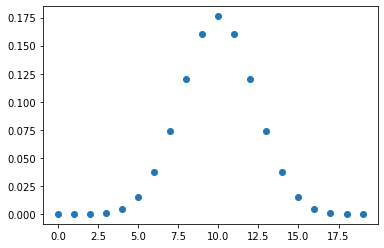

In [54]:
x=[i for i in range(20)]  # numero de exitos
y=[binom.pmf(x, 20, 0.5) for x in x] # su probabilidad

plt.scatter(x, y);
sum(y)

In [41]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

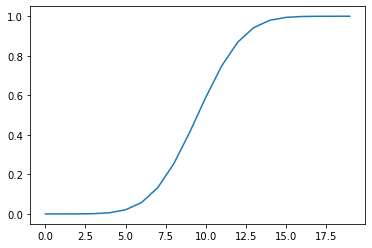

In [40]:
x=[i for i in range(20)]  # numero de exitos
y=[binom.cdf(x, 20, 0.5) for x in x] # su probabilidad

plt.plot(x, y);

In [42]:
from scipy.stats import geom

In [43]:
# ¿Cual es la prob de exito en el k-esimo intento?

In [44]:
geom.pmf(5, 0.5) #Que probabilidad de exito hay en el 5 intento siendo los demas fracasos

0.03125

In [45]:
geom.pmf(5, 0.2) 

0.08192000000000002

In [48]:
geom.pmf(2,0.5) #justo en el segundo experimento sea exito

0.25

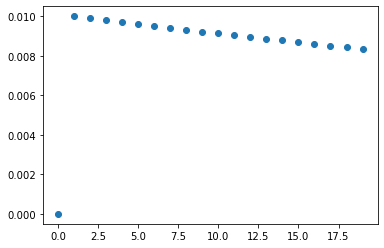

In [53]:
x=[i for i in range(20)]  
y=[geom.pmf(x, 0.01) for x in x] 

plt.scatter(x, y);

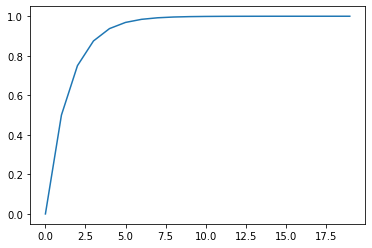

In [47]:
x=[i for i in range(20)]  
y=[geom.cdf(x, 0.5) for x in x] 

plt.plot(x, y);

### uniforme discreta

In [49]:
# https://es.wikipedia.org/wiki/Distribuci%C3%B3n_uniforme_discreta

In [50]:
from scipy.stats import randint

randint.pmf([0, 6, 7, 8, 10], 0, 8)   # (elementos, intervalo)

array([0.125, 0.125, 0.125, 0.   , 0.   ])

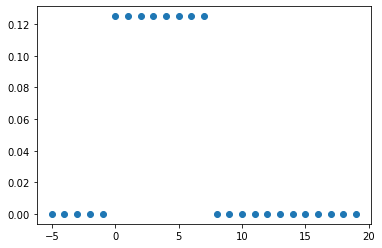

In [51]:
x=[i for i in range(-5, 20)]  
y=[randint.pmf(x, 0, 8) for x in x] 

plt.scatter(x, y);

In [55]:
y

[9.5367431640625e-07,
 1.907348632812499e-05,
 0.00018119812011718734,
 0.0010871887207031235,
 0.004620552062988271,
 0.014785766601562429,
 0.03696441650390614,
 0.07392883300781268,
 0.12013435363769531,
 0.16017913818359344,
 0.17619705200195293,
 0.16017913818359344,
 0.12013435363769531,
 0.07392883300781268,
 0.03696441650390614,
 0.014785766601562429,
 0.004620552062988271,
 0.0010871887207031235,
 0.00018119812011718734,
 1.907348632812499e-05]

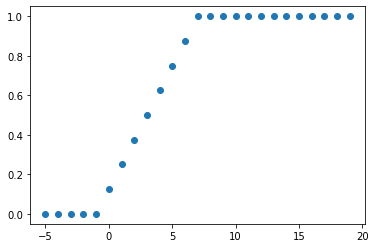

In [58]:
x=[i for i in range(-5, 20)]  
y=[randint.cdf(x, 0, 8) for x in x] 

plt.scatter(x, y);

In [57]:
y

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 0.25,
 0.375,
 0.5,
 0.625,
 0.75,
 0.875,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [59]:
### Poisson (ley de sucesos raros)

In [ ]:
# https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson

In [61]:
from scipy.stats import poisson #dada una media , probabilidad de ocurrencia del evento

In [62]:
poisson.pmf(2, 1.4)

0.24166502466277437

In [65]:
poisson.pmf(1, 3.5)

0.10569084197811476

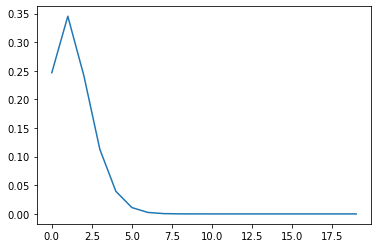

In [66]:
x=[i for i in range(20)]  
y=[poisson.pmf(x, 1.4) for x in x] 

plt.plot(x, y);

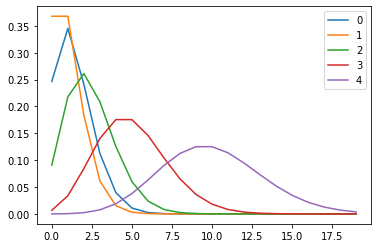

In [72]:
x=[i for i in range(20)]  
y=[poisson.pmf(x, 1.4) for x in x] 
plt.plot(x, y)
y=[poisson.pmf(x, 1) for x in x] 
plt.plot(x, y)
y=[poisson.pmf(x, 2.4) for x in x] 
plt.plot(x, y)
y=[poisson.pmf(x, 5) for x in x] 
plt.plot(x, y)
y=[poisson.pmf(x, 10) for x in x] 
plt.plot(x, y)
plt.legend([str(i) for i in x])
plt.show();

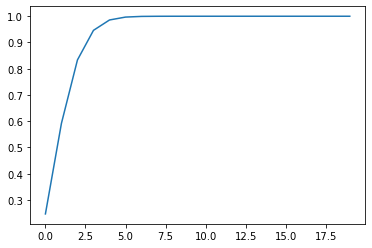

In [73]:
x=[i for i in range(20)]  
y=[poisson.cdf(x, 1.4) for x in x] 

plt.plot(x, y);

In [ ]:
#Futbol

In [74]:
equipo_a = 2.1 #goles promedio
equipo_b = 1.4

In [75]:
A = [poisson.pmf(i,equipo_a) for i in range(6)] #los goles por anotar, con la media de cada uno de los equipos
B = [poisson.pmf(i,equipo_b) for i in range(6)]

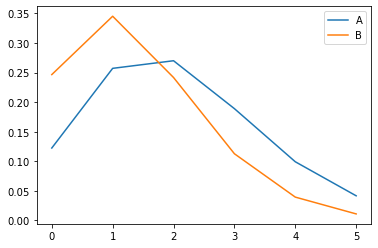

In [77]:
plt.plot([i for i in range(6)],A)
plt.plot([i for i in range(6)],B)
plt.legend(['A','B'])
plt.show();

In [ ]:
# Distribuciones Continua

In [79]:
from scipy.stats import uniform

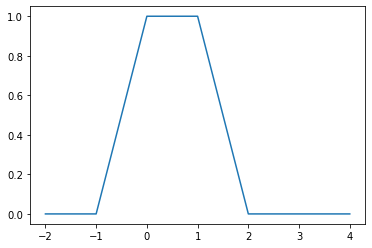

In [80]:
x=[i for i in range(-2, 5)]  
y=[uniform.pdf(x) for x in x]

plt.plot(x,y);

In [81]:
y

[0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0]

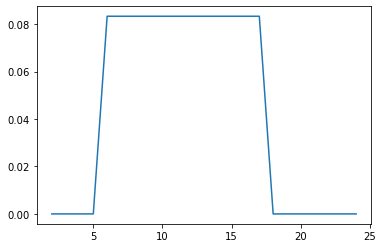

In [83]:
x=[i for i in range(2, 25)]  
y=[uniform.pdf(x, loc = 5.25, scale = 12) for x in x]

plt.plot(x,y);

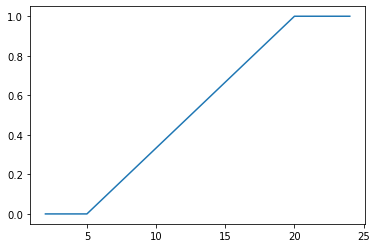

In [84]:
x=[i for i in range(2, 25)]  
y=[uniform.cdf(x, loc=5, scale=15) for x in x] 

plt.plot(x, y);

In [85]:
from scipy.stats import norm

In [86]:
norm.pdf(4,5,1)

0.24197072451914337

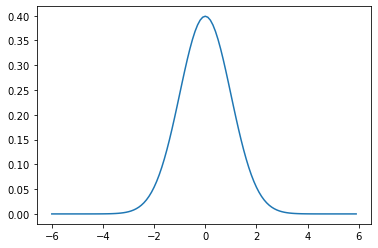

In [87]:
x=[i*.1 for i in range(-60, 60)]  
y=[norm.pdf(x, 0, 1) for x in x] 

plt.plot(x, y);

In [88]:
from scipy.stats import t

# t.pdf(x, dof)

t.pdf(3, 9)

0.012126090902239645

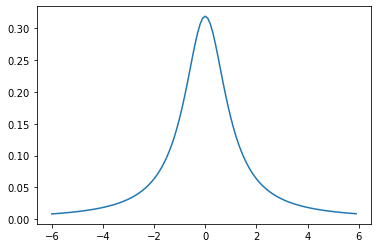

In [89]:
x=[i*.1 for i in range(-60,60)]  
y=[t.pdf(x, 1) for x in x] 

plt.plot(x, y);